In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pickle
import sys
import numpy as np
import emcee
import corner

sys.path.append('/pbs/throng/lsst/users/cpayerne/CLMassDC2/modules/')
import CL_WL_DATAOPS_make_profile as prf
sys.path.append('/pbs/throng/lsst/users/cpayerne/CLMassDC2/modules/')
#import CL_WL_miscentering as mis
import analysis_Mass_Richness_relation as analysis
import CL_Mass_richness_relation as modeling
import CL_WL_two_halo_term as twoh
import CL_WL_mass_conversion as utils
import CL_DATAOPS_match_catalogs as match
import CL_WL_DATAOPS_make_profile as prf
import CL_Likelihood_for_Mass_richness_relation as mr
import CL_Likelihood_for_Mass_richness_relation as likelihood_mr
import CL_WL_fit_cluster_mass_v1 as fit_v1
#import CL_WL_fit_cluster_mass_v2 as fit
#import analysis_Mass_Richness_relation as analysis
#import CL_fiducial_mass_richness_relation as fiducial
#import CL_Likelihood_for_Mass_richness_relation as mr

/pbs/home/c/cpayerne/.conda/envs/myenv/lib/python3.10/site-packages/clmm-1.7.3-py3.10.egg/clmm/theory/__init__.py:38: UserWarning: CLMM Backend requested `NumCosmo' is not available, trying others...
/pbs/home/c/cpayerne/.conda/envs/myenv/lib/python3.10/site-packages/clmm-1.7.3-py3.10.egg/clmm/theory/__init__.py:45: UserWarning: * USING ccl BACKEND


In [2]:
def load(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

In [3]:
profile_Metacal = load('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/individual_profile_dc2dr6_gal_redMaPPer_cluster_Metacal.pkl')
profile_HSM = load('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/individual_profile_dc2dr6_gal_redMaPPer_cluster_HSM.pkl')
profile_true = load('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/individual_profile_cosmoDC2_gal_redMaPPer_cluster_epsilon_shape_true_z.pkl')

In [4]:
#fiducial_constraint = fiducial.constrain_fiducial(used_cluster_id_list = np.array(profile_true['cluster_id']), low_M_cut = 3e13)

In [5]:
gt_av = profile_Metacal['gt_av']
R_T = profile_Metacal['<R_T>']
a_calib = []
for i, gt in enumerate(gt_av):
    R = R_T[i]
    norm = profile_Metacal['norm_sum'][i]
    a_calib.append(np.array([gt[j]/R[j] if norm[j] != 0 else 0 for j in range(len(gt))]))
profile_Metacal['gt_av_calib'] = np.array(a_calib)
profile_HSM['gt_av_calib'] = profile_HSM['gt_av']/.85

In [6]:
Obs_bin = analysis.Obs_bin
Z_bin = analysis.Z_bin

In [7]:
Obs_bin = [[20, 35], [35, 70], [70, 100]]

In [8]:
Z_bin = [[0.2, 0.3],
 [0.3, 0.4],
 [0.4, 0.5],
 [0.5, 0.6],
 [0.6, 0.7]]

# WL masses

Metacal

In [9]:
profile_Metacal_stack_calib = prf.stacked_profile(profile = profile_Metacal,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gt_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

covariance_Metacal_stack_calib = prf.bootstrap_covariance(profile = profile_Metacal,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    n_boot = 20,
                          #                                n_jack=100,
                    #n_boot = 400,
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

116
58
10
207
90
12
237
98
9
268
98
9
231
81
15


In [10]:
profile_Metacal_stack = prf.stacked_profile(profile = profile_Metacal,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gt_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

covariance_Metacal_stack = prf.bootstrap_covariance(profile = profile_Metacal,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    n_boot = 200,
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

116
58
10
207
90
12
237
98
9
268
98
9
231
81
15


HSM

In [11]:
profile_HSM_stack = prf.stacked_profile(profile = profile_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gt_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

covariance_HSM_stack = prf.bootstrap_covariance(profile = profile_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    #n_boot = 400,
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

116
58
10
207
90
12
237
98
9
268
98
9
231
81
15


In [12]:
profile_HSM_stack_calib = prf.stacked_profile(profile = profile_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gt_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

covariance_HSM_stack_calib = prf.bootstrap_covariance(profile = profile_HSM,
                    r_in = 'radius_av',
                    gt_in = 'gt_av_calib', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    n_boot = 400,
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

116
58
10
207
90
12
237
98
9
268
98
9
231
81
15


In [14]:
profile_stack_true = prf.stacked_profile(profile = profile_true,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gt_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

covariance_stack_true = prf.bootstrap_covariance(profile = profile_true,
                    r_in = 'radius_av',
                    gt_in = 'gt_av', gx_in = 'gx_av',
                    r_out = 'radius',
                    gt_out = 'gt', gx_out = 'gx',
                    weight = 'norm_sum',
                    n_boot = 400,
                    z_name = 'cluster_z', obs_name = 'richness',
                    Z_bin = Z_bin, Obs_bin = Obs_bin)

144
72
12
249
113
15
291
125
12
337
118
15
294
100
21


In [15]:
a = 1
b = 0
fit_Metacal = fit_v1.fit_WL_cluster_mass(profile = profile_Metacal_stack, covariance = covariance_Metacal_stack, a = a, b = b, rmax = 5.5, two_halo_term = False, fix_c = True)
fit_Metacal_calib = fit_v1.fit_WL_cluster_mass(profile = profile_Metacal_stack_calib, covariance = covariance_Metacal_stack_calib, a = a, b = b, rmax = 5.5, two_halo_term = False, fix_c = True)
fit_HSM = fit_v1.fit_WL_cluster_mass(profile = profile_HSM_stack, covariance = covariance_HSM_stack, a = a, b = b,rmax = 5.5, two_halo_term = False, fix_c = True)
fit_HSM_calib = fit_v1.fit_WL_cluster_mass(profile = profile_HSM_stack_calib, covariance = covariance_HSM_stack_calib, a = a, b = b,rmax = 5.5, two_halo_term = False, fix_c = True)
fit_true = fit_v1.fit_WL_cluster_mass(profile = profile_stack_true, covariance = covariance_stack_true, a = a, b = b,rmax = 5.5, two_halo_term = False, fix_c = True)

fitting...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
fitting...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
fitting...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
fitting...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
fitting...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


# Mass richness relation

In [16]:
fits_list = [fit_Metacal, fit_Metacal_calib, fit_HSM, fit_HSM_calib, fit_true]

In [18]:
z0 = analysis.z0
richness0 = analysis.richness0
initial_binned = [14.1,-0,.75]
npath = 100
ndim=3
nwalkers = 800
pos_binned = initial_binned + 0.01 * np.random.randn(nwalkers, len(initial_binned))


Modeling = modeling.WL_Mass_Richness()
Modeling.set_pivot_values( z0, richness0)
z0 = analysis.z0
richness0 = analysis.richness0
initial = [14.3,0,1]
npath = 100
ndim=3
nwalkers = 400
pos = initial + 0.01 * np.random.randn(nwalkers, len(initial))
#likelihood
sampler_list = []

#sampler = emcee.EnsembleSampler(nwalkers, ndim, lnL.lnLikelihood_individual_zrichness,)
for i,fits in enumerate(fits_list):
    fits = fits[fits['z_mean'] < 0.8]
    lnL = mr.MR_from_Stacked_Masses(logm=fits['log10M200c_WL'], logm_err=fits['err_log10M200c_WL'], 
    richness=fits['obs_mean'], richness_err=None, 
    z=fits['z_mean'], z_err=None,
    richness_individual=None, 
    z_individual=None, 
    n_cluster_per_bin=None, weights_individual=None, MRR_object=Modeling)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnL.lnLikelihood_binned_classic,)
    sampler.run_mcmc(pos, npath,progress=True)
    sampler_list.append(sampler.get_chain(discard = 0, flat = True))

100%|██████████| 100/100 [00:22<00:00,  4.45it/s]


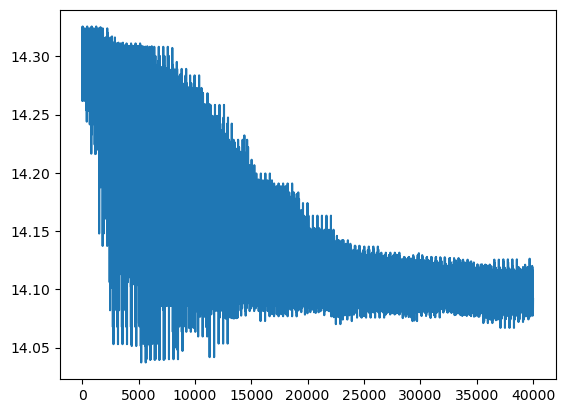

In [19]:
plt.plot(sampler_list[4][:,0])

In [20]:
sample_fiducial = np.load('/pbs/throng/lsst/users/cpayerne/CLMassDC2/notebooks/plots/fiducial_sample.txt.npy', allow_pickle = True)
log10M_true, G_true, F_true, s_true = np.mean(sample_fiducial, axis = 0)
log10M_true_err, G_true_err, F_true_err, s_true_err = np.std(sample_fiducial, axis = 0)

In [21]:
log10M_true, G_true, F_true

(14.143400937625936, -0.2928247304142298, 0.8155885265688505)

In [27]:
label_plot = [ r'WL Metacalibration',r'WL Metacalibration (calibrated)', r'WL HSM',r'WL HSM (calibrated)','cosmoDC2 galaxies']
sampler_tot =  sampler_list

0
1
2
3
4
0
1
2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

3
4


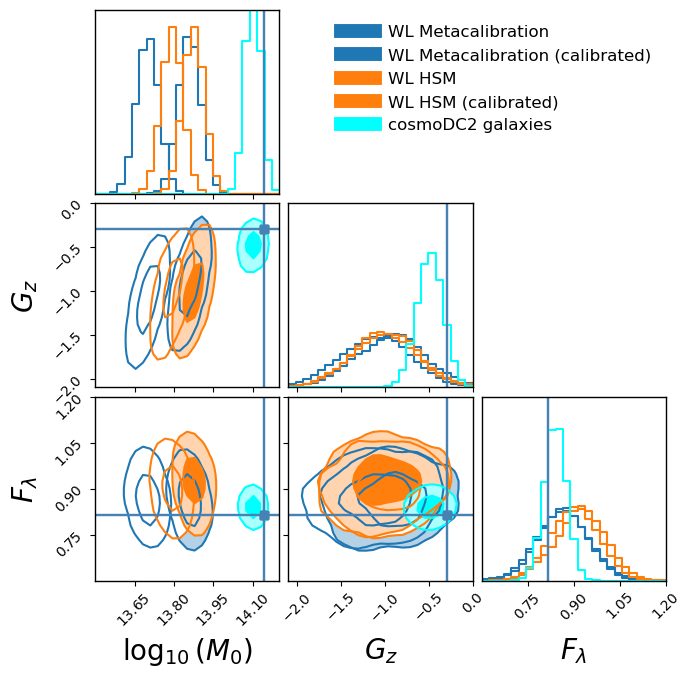

In [28]:
plt.rcParams['axes.linewidth'] = 1.
sigma1 = 1. - np.exp(-(1./1.)**2/2.)
sigma2 = 1. - np.exp(-(2./1.)**2/2.)
sigma3 = 1. - np.exp(-(3./1.)**2/2.)
bins = 25
labels = [r'$\log_{10}(M_{0})$', r'$G_z$',r'$F_\lambda$']
c = ['C0','C0','C1','C1','cyan']
fill_contours = [False, True, False,True,  True]
show = [True, True, True, True, True]
#range_ = [(p_-3*err_, p_+3*err_) for p_, err_ in enumerate(p, err)]
fig, axs = plt.subplots(len(labels), len(labels), figsize = (7,7))
for i, name in enumerate(label_plot):
    print(i)
    if show[i] == False: continue
    axs[0,2].plot([],[], c[i], linewidth = 10, label = label_plot[i])

for i,sample in enumerate(sampler_tot):
    print(i)
    if show[i] == False: continue
    a = len(sample)
    sample_cut = sample[30000:]
    #print(np.mean(sample[30000:], axis=0))
    fig = corner.corner(
    sample_cut,
    bins=bins, levels=(sigma1, sigma2),
        truths = [log10M_true, G_true, F_true],
    range = [(13.5, 14.2), (-2.1, 0.), (0.6, 1.2) ],
    fig = fig,
    color = c[i],
    smooth1d=True,smooth=True,plot_datapoints=False,
    fill_contours=fill_contours[i], labels = labels,            
    label_kwargs={"fontsize": 20},

    use_math_text=True,
    show_title = True,
    plot_density=False,
    max_n_ticks = 5,hist2d_kwargs = {'linestyle':'dashed'});
    
for i in range(len(labels)):
    for j in range(len(labels)):
        axs[i,j].tick_params(axis='both', which = 'major', labelsize= 10)
        axs[i,j].legend(frameon = False, fontsize = 12)
        if i == j:
            axs[i,j].set_ylim(0,3000)
plt.savefig('effect_shape_measurement', bbox_inches='tight', dpi=300)
#plt.savefig('/pbs/throng/lsst/users/cpayerne/ThesisAtCCin2p3/Images/shape.png', bbox_inches='tight', dpi=300)